In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import LabelEncoder 
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from pprint import pprint
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC,LinearSVR,SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import voting_classifier,BaggingClassifier,RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 



Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [208]:
train=pd.read_csv('train_LZdllcl.csv')

In [4]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

**fill Nan value by dropout**

In [209]:
train['education']= train['education'].fillna('dropout')

**fill nan value by Zero**

In [210]:
train.previous_year_rating=train.previous_year_rating.fillna(0)

In [9]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [31]:
educations=train.education.value_counts()

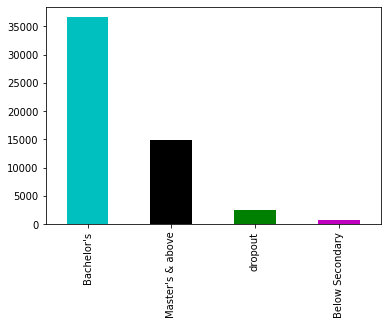

In [18]:
train.education.value_counts().plot(kind='bar',color=['c','k','g','m'])

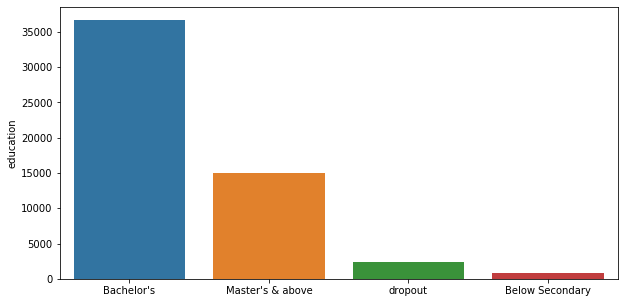

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(educations.index,educations)
plt.show()

In [33]:
sex=train.gender.value_counts()

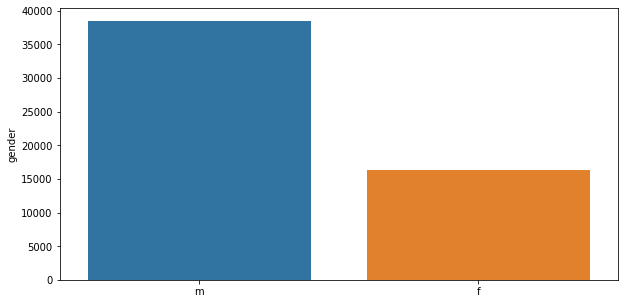

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(sex.index,sex)
plt.show()

In [35]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


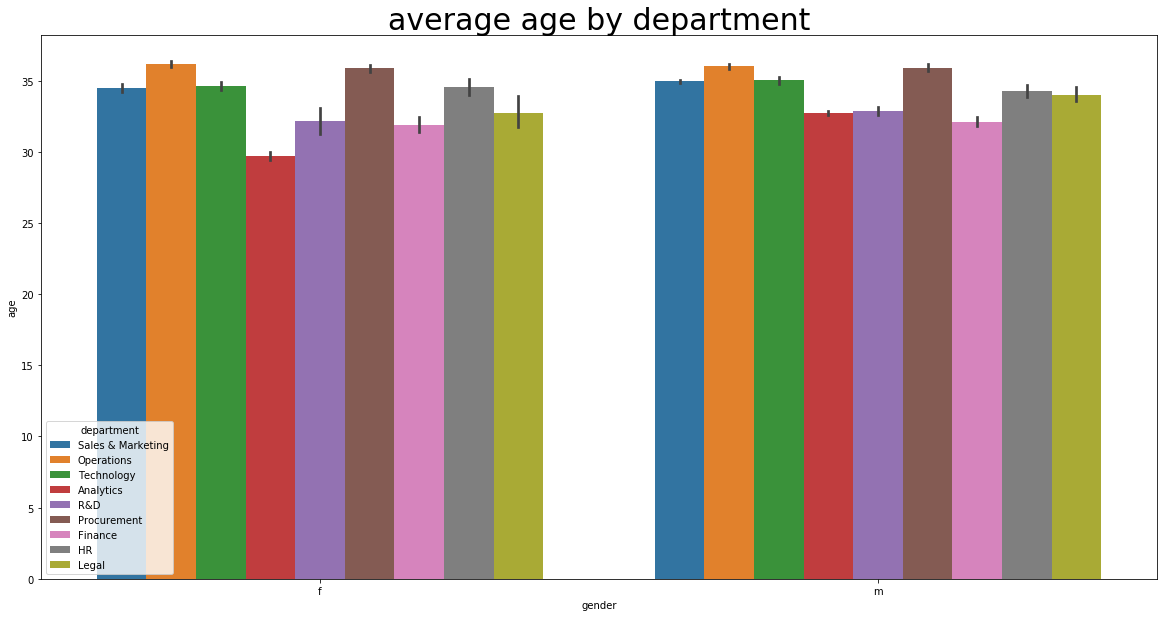

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x='gender',y='age',data=train,hue='department')
plt.title('average age by department',size=30)
plt.show()

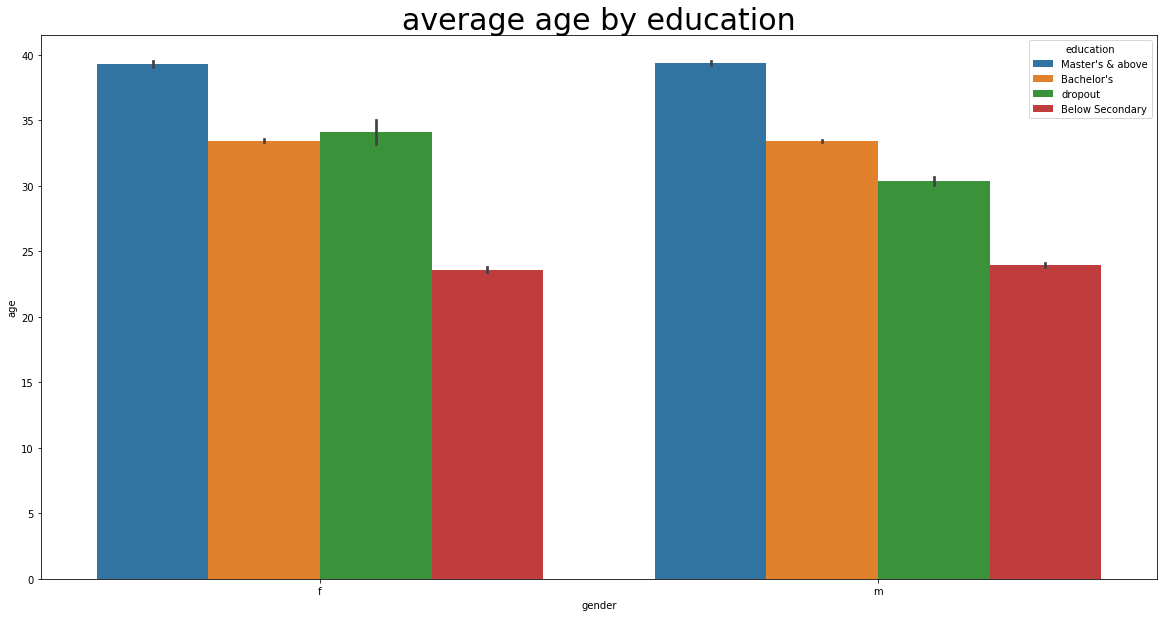

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='gender',y='age',data=train,hue='education')
plt.title('average age by education',size=30)
plt.show()

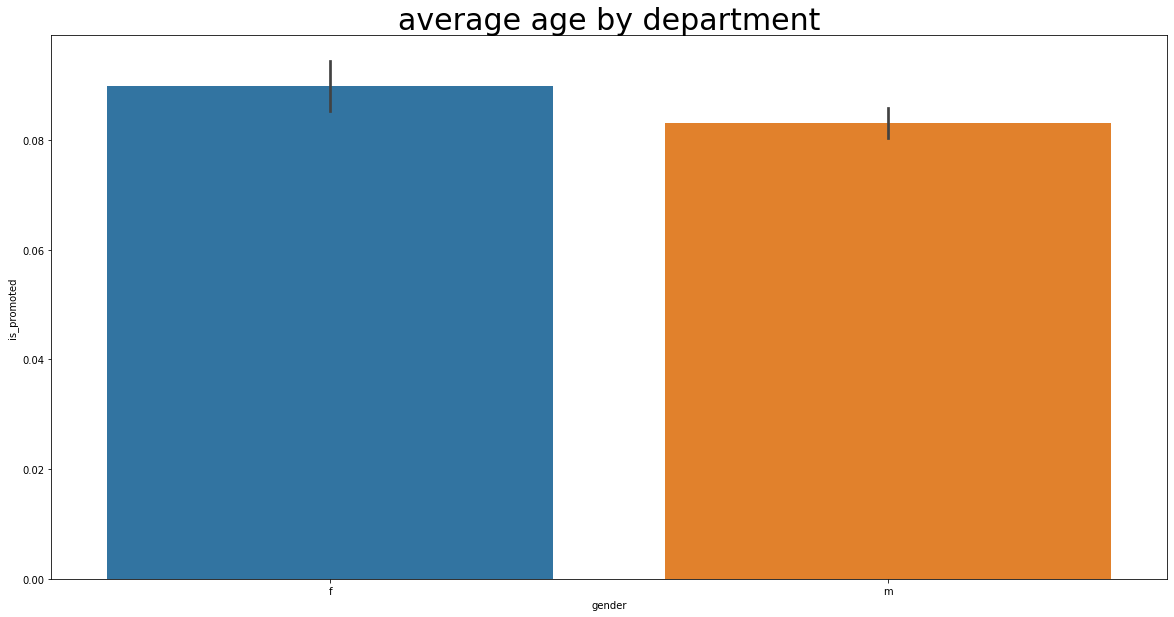

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='gender',y='is_promoted',data=train)
plt.title('average age by department',size=30)
plt.show()

In [59]:
female_is_prmot=train[train.gender=='f']['is_promoted']

In [58]:
male_is_prmot=train[train.gender=='m']['is_promoted']

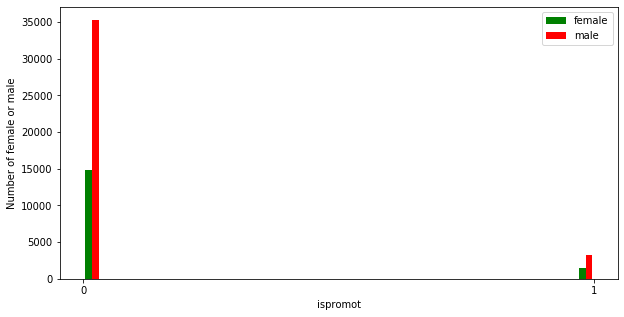

In [62]:

figure = plt.figure(figsize=(10,5))
plt.hist([female_is_prmot,male_is_prmot], color = ['g','r'],
         bins = 30,label = ['female','male'])
plt.xticks([0,1])
plt.xlabel('ispromot')
plt.ylabel('Number of female or male')
plt.legend()

In [63]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [66]:
avg_traning_score_female=train[train.gender=='f']['avg_training_score']

In [67]:
avg_traning_score_male=train[train.gender=='m']['avg_training_score']

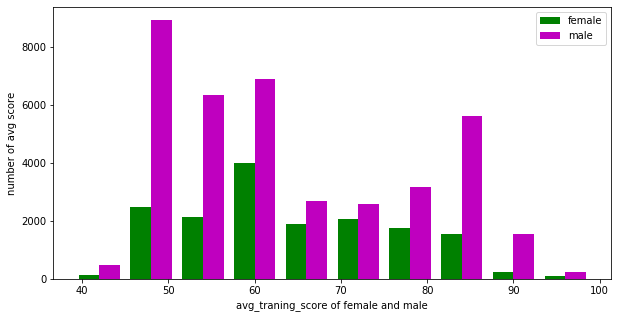

In [72]:
plt.figure(figsize=(10,5))
plt.hist([avg_traning_score_female,avg_traning_score_male],bins=10,color=['g','m'],label=['female','male'])
plt.xlabel('avg_traning_score of female and male')
plt.ylabel('number of avg score')
plt.legend()
plt.show()

In [74]:
educations=train.education.value_counts()

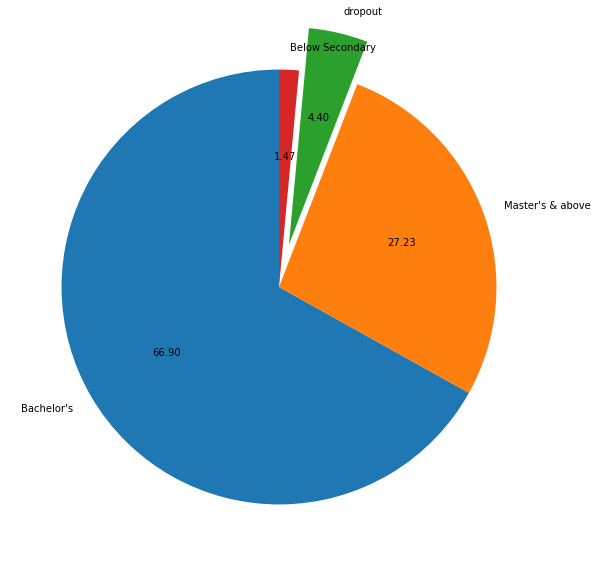

In [82]:
plt.figure(figsize=(20,10))
plt.pie(educations,labels=educations.index,autopct='%.2f',explode=[0,0,0.2,0],startangle=90,)
plt.show()

In [86]:
educations_is_promoted=train[train.is_promoted==1]['education'].value_counts()

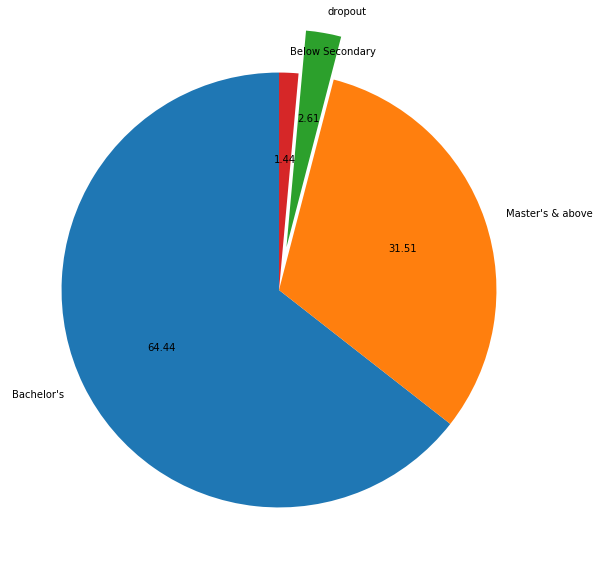

In [87]:
plt.figure(figsize=(20,10))
plt.pie(educations_is_promoted,labels=educations_is_promoted.index,autopct='%.2f',explode=[0,0,0.2,0],startangle=90,)
plt.show()

In [90]:
educations_is_promoted_not=train[train.is_promoted==0]['education'].value_counts()

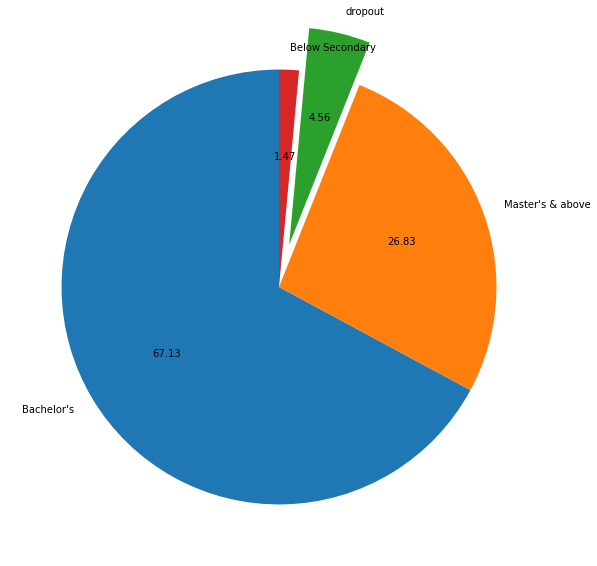

In [89]:
plt.figure(figsize=(20,10))
plt.pie(educations_is_promoted_not,labels=educations_is_promoted_not.index,autopct='%.2f',explode=[0,0,0.2,0],startangle=90,)
plt.show()

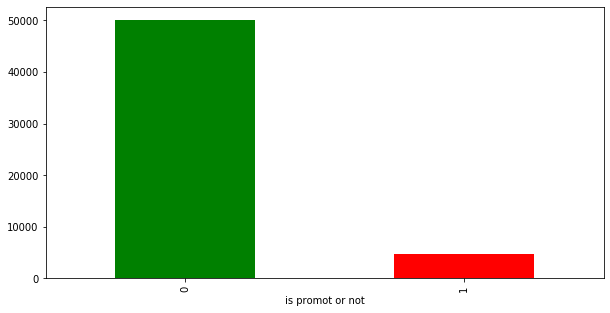

In [100]:
plt.figure(figsize=(10,5))
train.is_promoted.value_counts().plot(kind='bar',color=['g','r'])
plt.xlabel('is promot or not')
plt.show()

<Figure size 720x360 with 0 Axes>

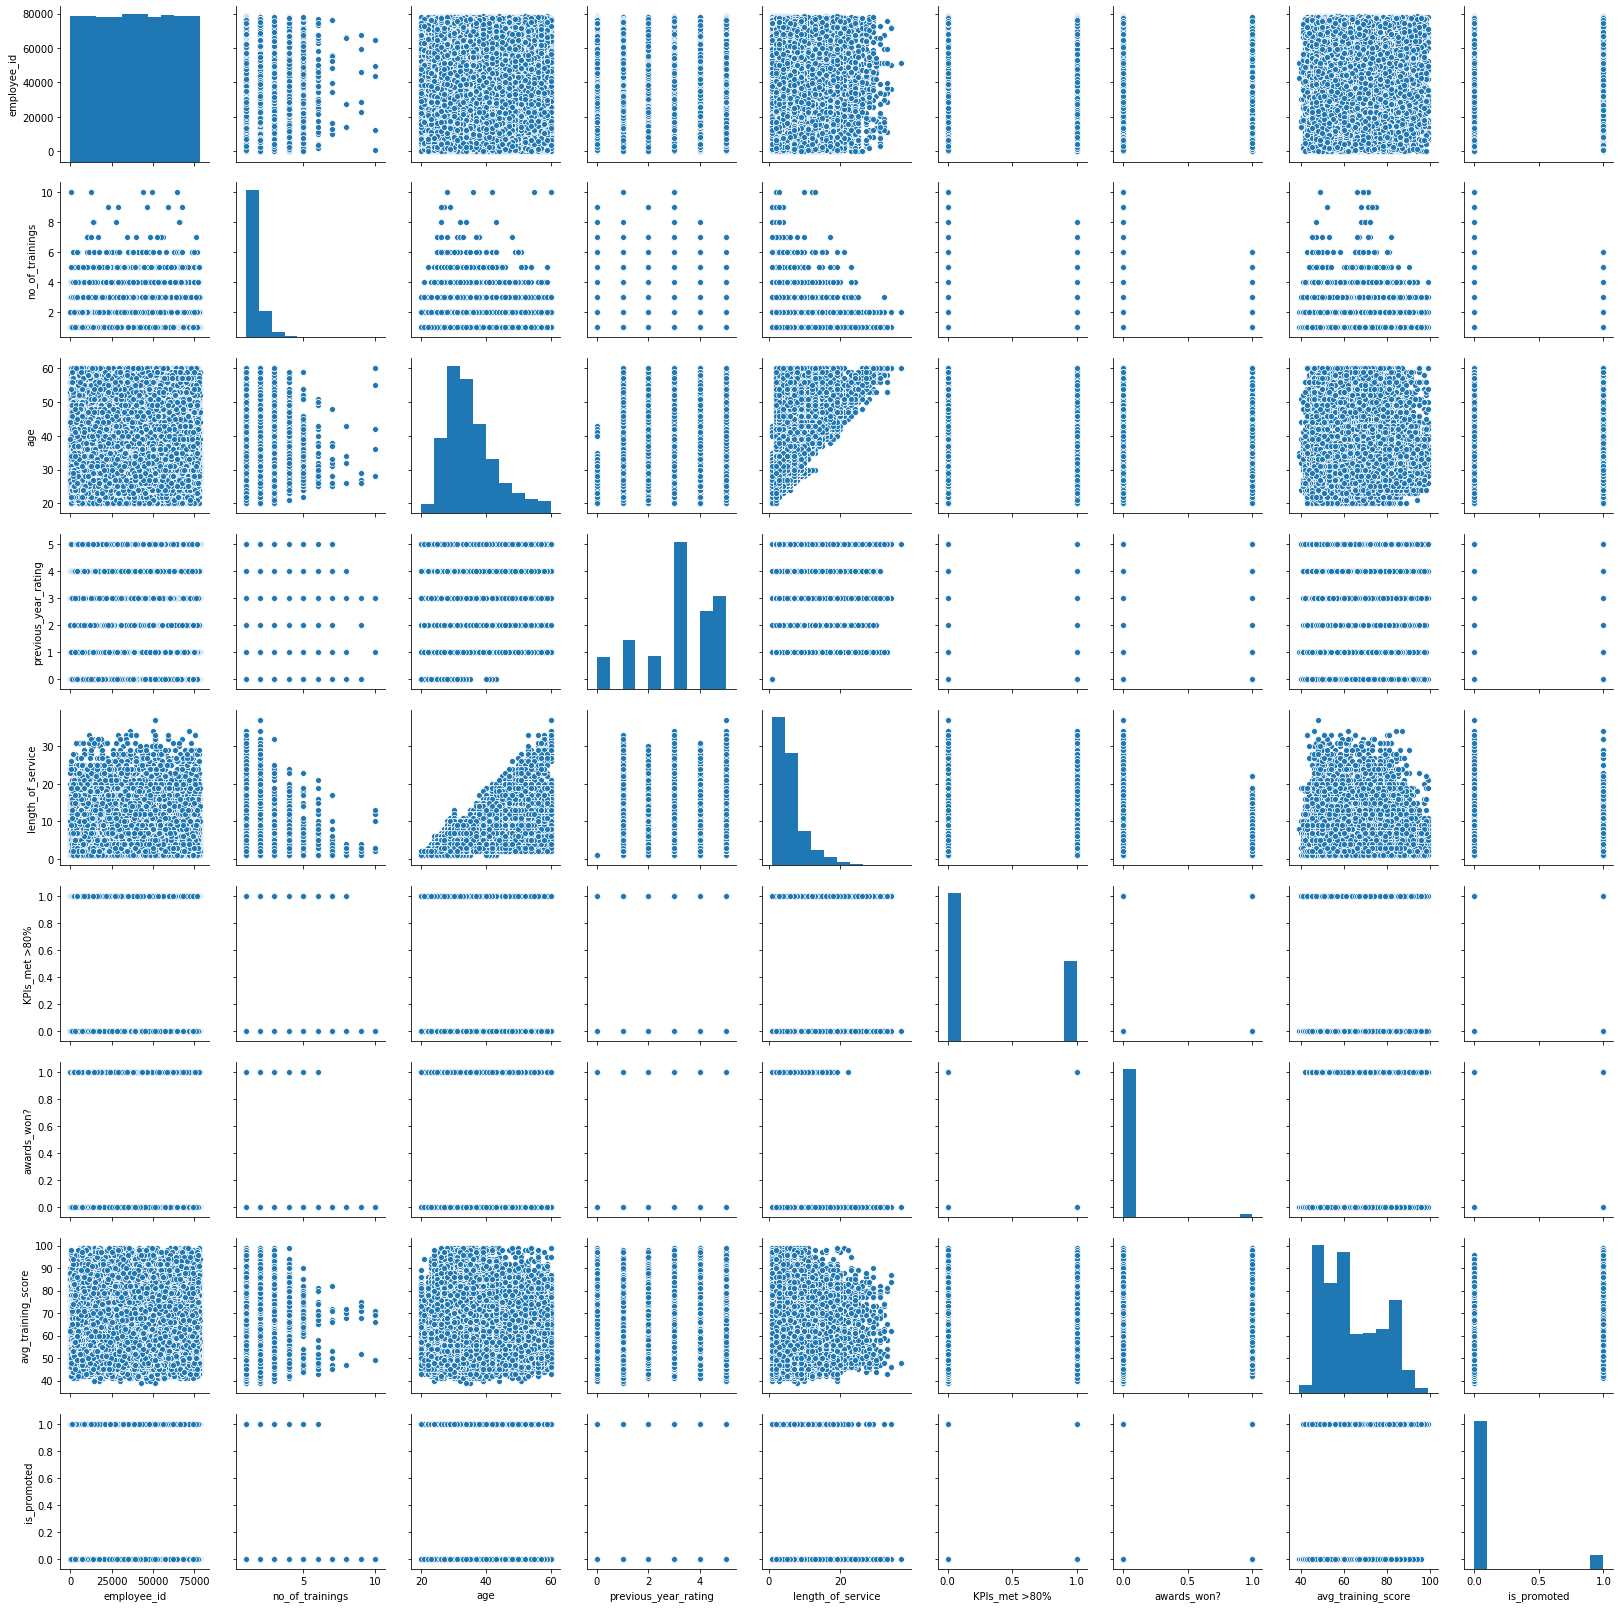

In [102]:
plt.figure(figsize=(10,5))
sns.pairplot(train) # diamond
plt.show()

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [223]:
le1=LabelEncoder()
le2=LabelEncoder()

In [224]:
train['new_department']=le1.fit_transform(train.department)

In [225]:
for i,d in enumerate(le1.classes_):
    print(f'department {d} which we transform into {i}')

department Analytics which we transform into 0
department Finance which we transform into 1
department HR which we transform into 2
department Legal which we transform into 3
department Operations which we transform into 4
department Procurement which we transform into 5
department R&D which we transform into 6
department Sales & Marketing which we transform into 7
department Technology which we transform into 8


In [139]:
r=[]
for i in train.region:
    l=i.split('_')[1]
    r.append(int(l))

In [140]:
train['new_region']=r

In [233]:
train['new_education']=le2.fit_transform(train.education)

In [219]:
for i,e in enumerate(le.classes_):
    print(f"education {e} which we transform into {i}")

education Bachelor's which we transform into 0
education Below Secondary which we transform into 1
education Master's & above which we transform into 2
education dropout which we transform into 3


In [146]:
train=pd.get_dummies(train,columns=['gender'])

In [150]:
train=pd.get_dummies(train,columns=['recruitment_channel'])

In [152]:
train=train.drop(['employee_id','department','region','education'],axis=1)

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
no_of_trainings                 54808 non-null int64
age                             54808 non-null int64
previous_year_rating            54808 non-null float64
length_of_service               54808 non-null int64
KPIs_met >80%                   54808 non-null int64
awards_won?                     54808 non-null int64
avg_training_score              54808 non-null int64
is_promoted                     54808 non-null int64
new_department                  54808 non-null int32
new_region                      54808 non-null int64
new_education                   54808 non-null int32
gender_f                        54808 non-null uint8
gender_m                        54808 non-null uint8
recruitment_channel_other       54808 non-null uint8
recruitment_channel_referred    54808 non-null uint8
recruitment_channel_sourcing    54808 non-null uint8
dtypes: float64(1), int32(2), int64(8), u

In [156]:
x=train.drop(['is_promoted'],axis=1)

In [157]:
y=train.is_promoted

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [164]:
pip1=make_pipeline(StandardScaler(),LogisticRegression())

In [173]:
params={'logisticregression__C':range(1,5),
        'logisticregression__tol':[0.001,0.1,0.0001,0.00001]
    
}
model1=GridSearchCV(pip1,params,n_jobs=-1,cv=5)

In [174]:
model1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logisticregression__C': range(1, 5), 'logisticregression__tol': [0.001, 0.1, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
model1.best_score_

0.9168773621790695

In [176]:
model1.best_params_

{'logisticregression__C': 1, 'logisticregression__tol': 0.001}

In [177]:
model1.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9174116645381013

In [178]:
pip2=make_pipeline(StandardScaler(),KNeighborsClassifier())

In [182]:
params={'kneighborsclassifier__n_neighbors':range(1,5),
        'kneighborsclassifier__weights':['uniform','distance'],
        
        
    
}
model2=GridSearchCV(pip2,params,cv=5,n_jobs=-1)

In [183]:
model2.fit(x_train,y_train)

KeyboardInterrupt: 

In [184]:
model2=SVC()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()
model5=BaggingClassifier()

In [185]:
model2.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [186]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
model4.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
model5.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [189]:
model2.score(x_train,y_train)

0.938772318519484

In [190]:
model3.score(x_train,y_train)

0.9998436074547113

In [191]:
model4.score(x_train,y_train)

0.9893131760719406

In [192]:
model5.score(x_train,y_train)

0.991867587644989

In [198]:
model5.score(x_test,y_test)

0.9324940704251049

In [200]:
x_train.shape

(38365, 15)

In [201]:
model6=Sequential()
model6.add(Dense(100,activation='relu',input_shape=(15,)))
model6.add(Dense(100,activation='relu'))
model6.add(Dense(2,activation='softmax'))
callbacks=[EarlyStopping(patience=20)]
model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0209 20:26:39.661702 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0209 20:26:39.711534 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0209 20:26:39.723502 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0209 20:26:39.763535 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0209 20:26:39.782377 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anac

In [202]:
print(y_train.shape)
y_cate=to_categorical(y_train)
x_scaled=StandardScaler().fit_transform(x_train)
print(y_cate.shape)


(38365,)
(38365, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [205]:
model6.fit(x_scaled,y_cate,epochs=10,validation_split=0.3,callbacks=callbacks)

W0209 20:28:38.032977 12060 deprecation.py:323] From C:\Users\mahav\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0209 20:28:38.071903 12060 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 26855 samples, validate on 11510 samples
Epoch 1/10
26855/26855 [==============================] - 3s 97us/step - loss: 0.2421 - acc: 0.9182 - val_loss: 0.2313 - val_acc: 0.9205
Epoch 2/10
26855/26855 [==============================] - 1s 30us/step - loss: 0.2253 - acc: 0.9226 - val_loss: 0.2268 - val_acc: 0.9214
Epoch 3/10
26855/26855 [==============================] - 1s 29us/step - loss: 0.2172 - acc: 0.9242 - val_loss: 0.2204 - val_acc: 0.9248
Epoch 4/10
26855/26855 [==============================] - 1s 30us/step - loss: 0.2098 - acc: 0.9258 - val_loss: 0.2130 - val_acc: 0.9241
Epoch 5/10
26855/26855 [==============================] - 1s 30us/step - loss: 0.2006 - acc: 0.9279 - val_loss: 0.2054 - val_acc: 0.9277
Epoch 6/10
26855/26855 [==============================] - 1s 30us/step - loss: 0.1931 - acc: 0.9313 - val_loss: 0.1968 - val_acc: 0.9305
Epoch 7/10
26855/26855 [==============================] - 1s 30us/step - loss: 0.1884 - acc: 0.9332 - val_loss: 0.1977 - val_acc

In [226]:
test=pd.read_csv('test_2umaH9m.csv')

In [227]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [228]:
test['education']= test['education'].fillna('dropout')

In [229]:
test.previous_year_rating=test.previous_year_rating.fillna(0)

In [230]:
test['new_department']=le1.transform(test.department)

In [234]:
test['new_education']=le2.transform(test.education)

In [236]:
r=[]
for i in test.region:
    l=i.split('_')[1]
    r.append(int(l))

In [237]:
test['new_region']=r

In [238]:
test=pd.get_dummies(test,columns=['gender'])

In [240]:
test=pd.get_dummies(test,columns=['recruitment_channel'])

In [241]:
test=test.drop(['employee_id','department','region','education'],axis=1)

In [242]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 15 columns):
no_of_trainings                 23490 non-null int64
age                             23490 non-null int64
previous_year_rating            23490 non-null float64
length_of_service               23490 non-null int64
KPIs_met >80%                   23490 non-null int64
awards_won?                     23490 non-null int64
avg_training_score              23490 non-null int64
new_department                  23490 non-null int32
new_education                   23490 non-null int32
new_region                      23490 non-null int64
gender_f                        23490 non-null uint8
gender_m                        23490 non-null uint8
recruitment_channel_other       23490 non-null uint8
recruitment_channel_referred    23490 non-null uint8
recruitment_channel_sourcing    23490 non-null uint8
dtypes: float64(1), int32(2), int64(7), uint8(5)
memory usage: 1.7 MB


In [243]:
x_test_scaled=StandardScaler().fit_transform(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [263]:
y_sub=model5.predict(x_test_scaled)

In [251]:
sub=pd.DataFrame({'':range(892,1310),'survived':y_perd})

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [257]:
sample=pd.read_csv('test_2umaH9m.csv')

In [258]:
sample

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [264]:
sub=pd.DataFrame({'employee_id':sample.employee_id,'is_promoted':y_sub})

In [265]:
sub.to_csv('om.csv',index=False)

In [261]:
x_test_scaled.size

352350

In [262]:
y_sub.size

16443

In [149]:
set(train.recruitment_channel)

{'other', 'referred', 'sourcing'}

In [133]:
train.head()

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [123]:
r=[]
for i in train.region:
    l=i.split('_')[1]
    r.append(int(l))
    

In [124]:
r

[7,
 22,
 19,
 23,
 26,
 2,
 20,
 34,
 20,
 1,
 23,
 7,
 4,
 29,
 2,
 7,
 2,
 31,
 31,
 15,
 14,
 15,
 11,
 5,
 22,
 22,
 26,
 26,
 5,
 4,
 15,
 31,
 7,
 2,
 22,
 22,
 28,
 7,
 1,
 28,
 15,
 2,
 2,
 2,
 2,
 17,
 13,
 16,
 20,
 2,
 2,
 25,
 15,
 22,
 22,
 31,
 31,
 22,
 16,
 19,
 4,
 29,
 22,
 1,
 26,
 13,
 22,
 22,
 10,
 31,
 22,
 22,
 2,
 16,
 7,
 2,
 27,
 30,
 2,
 22,
 2,
 4,
 2,
 22,
 7,
 11,
 20,
 2,
 7,
 31,
 2,
 12,
 2,
 2,
 2,
 14,
 26,
 2,
 31,
 2,
 15,
 26,
 7,
 7,
 28,
 13,
 13,
 2,
 16,
 22,
 22,
 13,
 2,
 7,
 2,
 4,
 2,
 21,
 23,
 15,
 2,
 25,
 34,
 22,
 2,
 8,
 27,
 27,
 1,
 25,
 11,
 22,
 29,
 22,
 26,
 7,
 15,
 28,
 14,
 27,
 29,
 23,
 25,
 22,
 2,
 15,
 22,
 29,
 5,
 4,
 7,
 5,
 2,
 22,
 13,
 13,
 29,
 13,
 25,
 16,
 4,
 26,
 5,
 2,
 22,
 2,
 16,
 23,
 22,
 7,
 12,
 2,
 7,
 2,
 2,
 2,
 22,
 2,
 26,
 25,
 14,
 2,
 27,
 13,
 7,
 15,
 2,
 2,
 17,
 2,
 23,
 7,
 31,
 7,
 27,
 22,
 32,
 20,
 15,
 2,
 23,
 2,
 25,
 31,
 16,
 2,
 1,
 26,
 2,
 19,
 2,
 7,
 27,
 28,
 4,
 1,
 12,
